# Corsework part one

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [314]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [315]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [316]:
initial_data = yf.download("TWTR", start="2020-03-01", end="2021-03-02")

[*********************100%***********************]  1 of 1 completed


In [317]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,36.000000,36.860001,35.139999,35.820000,35.820000,39914700
2020-03-03,36.020000,36.480000,34.410000,34.930000,34.930000,22973100
2020-03-04,35.759998,36.000000,34.770000,36.000000,36.000000,14980300
2020-03-05,35.029999,35.730000,34.520000,34.970001,34.970001,14132200
2020-03-06,33.810001,33.990002,32.509998,33.459999,33.459999,20361100


In [318]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-23,68.449997,74.330002,66.190002,73.169998,73.169998,32669500
2021-02-24,73.099998,73.949997,71.709999,71.919998,71.919998,18309900
2021-02-25,78.150002,80.750000,73.889999,74.589996,74.589996,63625700
2021-02-26,76.870003,79.080002,75.000000,77.059998,77.059998,35307600
2021-03-01,78.360001,78.730003,76.050003,77.629997,77.629997,24277600


In [319]:
initial_data['Adj Close'].head()

Date
2020-03-02    35.820000
2020-03-03    34.930000
2020-03-04    36.000000
2020-03-05    34.970001
2020-03-06    33.459999
Name: Adj Close, dtype: float64

Set the Adj Closed data as a new DataFrame we will use.

In [320]:
data1 =  initial_data['Adj Close'] 
data = pd.DataFrame(data1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-02 to 2021-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [321]:
data.tail()

,Adj Close
Date,
2021-02-23,73.169998
2021-02-24,71.919998
2021-02-25,74.589996
2021-02-26,77.059998
2021-03-01,77.629997


array([<AxesSubplot:xlabel='Date'>], dtype=object)

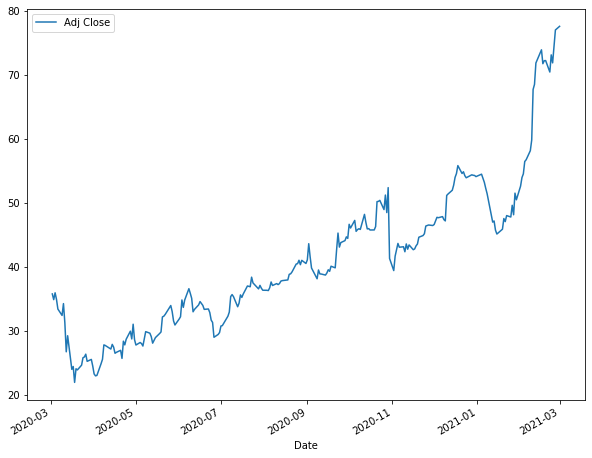

In [322]:
data.plot(figsize=(10, 8), subplots=True)

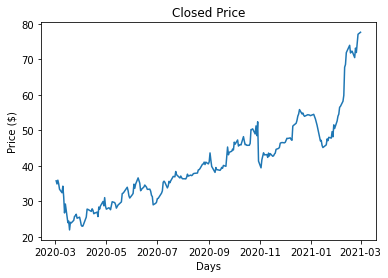

In [382]:
import matplotlib.pyplot as plt 
fig0 = plt.figure()
plt.plot(initial_data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');
#daily closing price plot

### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [323]:
data.diff().head().round(2)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.89
2020-03-04,1.07
2020-03-05,-1.03
2020-03-06,-1.51


In [324]:
data.diff().tail().round(2)

,Adj Close
Date,
2021-02-23,2.68
2021-02-24,-1.25
2021-02-25,2.67
2021-02-26,2.47
2021-03-01,0.57


In [325]:
data.diff().describe().round(2)

,Adj Close
count,251.00
mean,0.17
std,1.58
min,-11.07
25%,-0.58
50%,0.16
75%,0.80
max,7.90


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [326]:
data.pct_change().round(4).head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0248
2020-03-04,0.0306
2020-03-05,-0.0286
2020-03-06,-0.0432


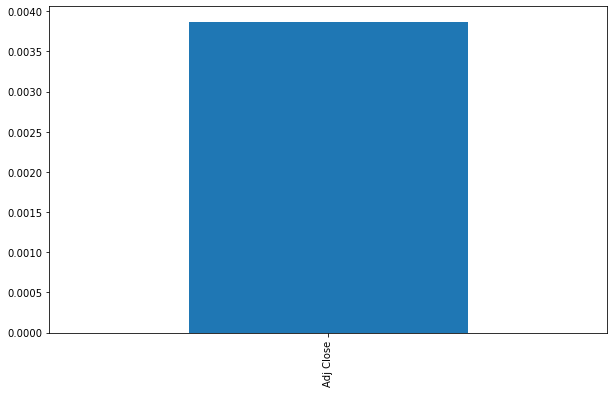

In [327]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [328]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0252
2020-03-04,0.0302
2020-03-05,-0.0290
2020-03-06,-0.0441


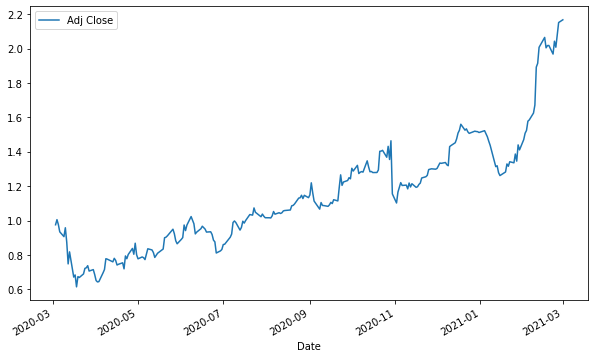

In [329]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [334]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2020-03-08,33.459999
2020-03-15,29.290001
2020-03-22,23.950001
2020-03-29,25.290001
2020-04-05,23.090000


In [335]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2020-03-31,24.559999
2020-04-30,28.680000
2020-05-31,30.969999
2020-06-30,29.790001
2020-07-31,36.400002


<AxesSubplot:xlabel='Date'>

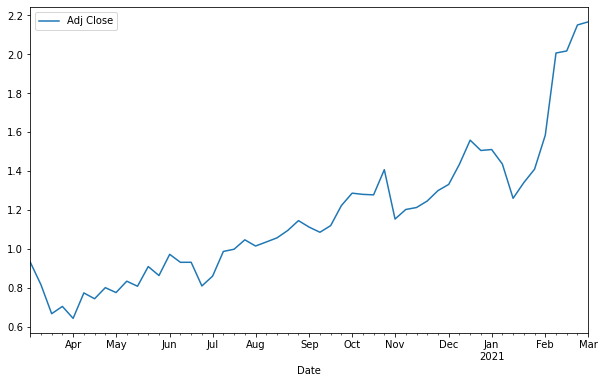

In [336]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

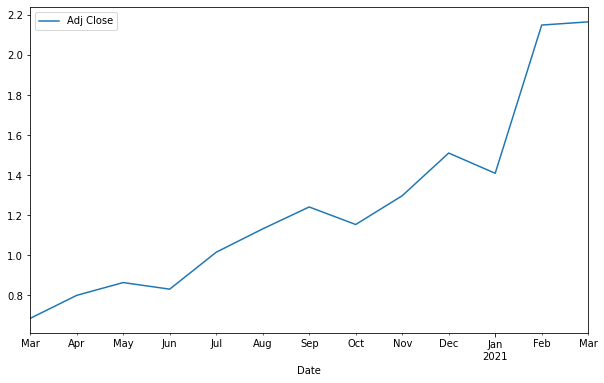

In [337]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single
financial time series only:

In [155]:
TWTR_data = pd.DataFrame(data["TWTR"]).dropna()
TWTR_data.tail()

,TWTR
Date,
2021-02-23,73.169998
2021-02-24,71.919998
2021-02-25,74.589996
2021-02-26,77.059998
2021-03-01,77.629997


In [160]:
TWTR_data = pd.DataFrame(data["TWTR"]).dropna()
TWTR_data.head()

,TWTR
Date,
2020-03-02,35.820000
2020-03-03,34.930000
2020-03-04,36.000000
2020-03-05,34.970001
2020-03-06,33.459999


In [157]:
window = 10
sym = 'TWTR'
TWTR_data['min'] = data[sym].rolling(window=window).min()
TWTR_data['mean'] = data[sym].rolling(window=window).mean()
TWTR_data['std'] = data[sym].rolling(window=window).std()
TWTR_data['median'] = data[sym].rolling(window=window).median()
TWTR_data['max'] = data[sym].rolling(window=window).max()
TWTR_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
TWTR_data.dropna().head()

,TWTR,min,mean,std,median,max,ewma
Date,,,,,,,
2020-03-13,29.290001,26.780001,32.932,3.019819,33.885000,36.000000,28.986194
2020-03-16,24.040001,24.040001,31.754,3.928868,32.959999,36.000000,25.276548
2020-03-17,24.480000,24.040001,30.709,4.356705,31.879999,36.000000,24.679137
2020-03-18,22.000000,22.000000,29.309,4.703189,30.295000,34.970001,22.669784
2020-03-19,24.129999,22.000000,28.225,4.498203,28.035001,34.310001,23.764945


In [161]:
TWTR_data

,TWTR
Date,
2020-03-02,35.820000
2020-03-03,34.930000
2020-03-04,36.000000
2020-03-05,34.970001
2020-03-06,33.459999
...,...
2021-02-23,73.169998
2021-02-24,71.919998
2021-02-25,74.589996


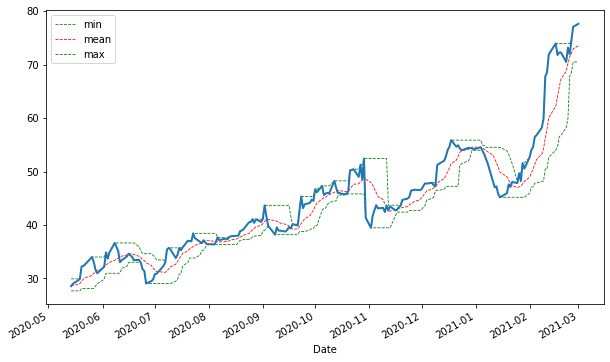

In [98]:
ax = TWTR_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame
object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [117]:
TWTR_data['SMA1'] = data[sym].rolling(window=20).mean()
TWTR_data['SMA2'] = data[sym].rolling(window=60).mean()
TWTR_data[[sym, 'SMA1', 'SMA2']].tail()

,TWTR,SMA1,SMA2
Date,,,
2021-02-23,73.169998,61.736999,54.146666
2021-02-24,71.919998,62.849499,54.571500
2021-02-25,74.589996,64.169499,55.038166
2021-02-26,77.059998,65.443999,55.547333
2021-03-01,77.629997,66.798999,56.063333


In [118]:
TWTR_data['SMA3'] = data[sym].rolling(window=5).mean()
TWTR_data['SMA4'] = data[sym].rolling(window=10).mean()
TWTR_data[[sym, 'SMA3', 'SMA4']].tail()

,TWTR,SMA3,SMA4
Date,,,
2021-02-23,73.169998,71.998000,70.204999
2021-02-24,71.919998,72.023999,71.409999
2021-02-25,74.589996,72.489998,72.091999
2021-02-26,77.059998,73.445998,72.941999
2021-03-01,77.629997,74.873997,73.514999


<AxesSubplot:xlabel='Date'>

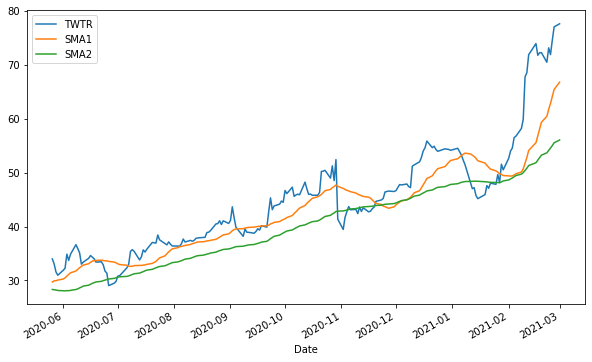

In [119]:
TWTR_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))
#if the 20 days moving average is more than 60 days moving average will be increasing trend

<AxesSubplot:xlabel='Date'>

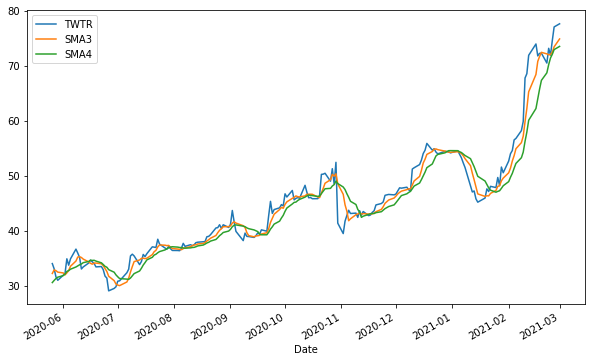

In [120]:
TWTR_data[[sym, 'SMA3', 'SMA4']].plot(figsize=(10, 6))

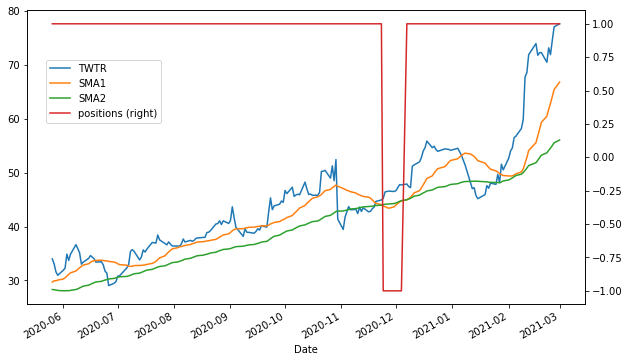

In [121]:
TWTR_data.dropna(inplace=True)
TWTR_data['positions'] = np.where(TWTR_data['SMA1'] > TWTR_data['SMA2'],1,-1)
ax = TWTR_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
#Trend analysis

### The normal daily returns and log-returns. Then the annualized return and volatility of Twitter (TWYR)

In [338]:
data.describe().round(2)

,Adj Close
count,252.00
mean,40.90
std,11.50
min,22.00
25%,32.43
50%,39.17
75%,47.22
max,77.63


In [339]:
data.head()

,Adj Close
Date,
2020-03-02,35.820000
2020-03-03,34.930000
2020-03-04,36.000000
2020-03-05,34.970001
2020-03-06,33.459999


In [344]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.02484643766697288,
 0.03063268495493459,
 -0.028611077202690974,
 -0.04317992803890751,
 -0.029886432377819665]

In [345]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.02516032055734001,
 0.030172870900587793,
 -0.029028352473673566,
 -0.04413991778560414,
 -0.03034213431517314]

In [346]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.97061639 and its annulized volatility is 0.61893803


In [347]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.77344753 and its annulized volatility is 0.63171734


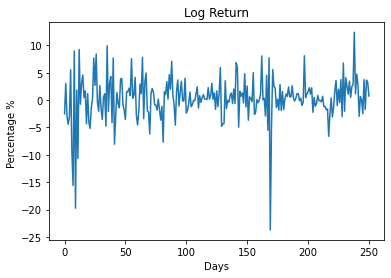

In [383]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

### Then the semi annually (first 6 months) return and volatility of Twitter

In [357]:
normal_return_first_6months=normal_return [:125]

In [365]:
normal_return_first_6months[:5]

[-0.02484643766697288,
 0.03063268495493459,
 -0.028611077202690974,
 -0.04317992803890751,
 -0.029886432377819665]

In [366]:
log_return_first_6months=log_return [:125]

In [367]:
log_return_first_6months [:5]

[-0.02516032055734001,
 0.030172870900587793,
 -0.029028352473673566,
 -0.04413991778560414,
 -0.03034213431517314]

In [369]:
dfnr0 = pd.DataFrame(normal_return_first_6months, columns = ['normal']) 
nr0 = dfnr0.mean() * len(dfnr0)
nv0 = dfnr0.std() * (len(dfnr0) ** 0.5)
print('The semi annually (first 6 months) normal return is %.8f and its semi annually (first 6 months) volatility is %.8f' % (nr0,nv0))

The semi annually (first 6 months) normal return is 0.23275295 and its semi annually (first 6 months) volatility is 0.47103632


In [371]:
dflr0 = pd.DataFrame(log_return_first_6months, columns = ['log']) 
lr0 = dflr0.mean() * len(dflr0)
lv0 = dflr0.std() * (len(dflr0) ** 0.5)
print('The semi annually (last 6 months) log return is %.8f and its semi annually (last 6 months) volatility is %.8f' % (lr0,lv0))

The semi annually (last 6 months) log return is 0.12007583 and its semi annually (last 6 months) volatility is 0.47952678


### The semi annually (last 6 months) return and volatility of Twitter

In [348]:
normal_return_last_6months=normal_return [125:]

In [362]:
len(normal_return_first_6months)

125

In [363]:
len(normal_return_last_6months)

126

In [364]:
len(dfnr)

251

In [350]:
normal_return_last_6months[:5]

[0.016835858268174637,
 -0.011930797842963765,
 0.01404632008636369,
 0.061239284316468384,
 -0.04671392686892221]

In [352]:
log_return_last_6months=log_return [125:]

In [353]:
log_return_last_6months [:5]

[0.016695706073972943,
 -0.012002541018077469,
 0.013948584684210502,
 0.05943736136414435,
 -0.04784023870389146]

In [355]:
dfnr1 = pd.DataFrame(normal_return_last_6months, columns = ['normal']) 
nr1 = dfnr1.mean() * len(dfnr1)
nv1 = dfnr1.std() * (len(dfnr1) ** 0.5)
print('The semi annually (last 6 months) normal return is %.8f and its semi annually (last 6 months) volatility is %.8f' % (nr1,nv1))

The semi annually (last 6 months) normal return is 0.73786344 and its last 6 months  volatility is 0.40216974


In [372]:
dflr1 = pd.DataFrame(log_return_last_6months, columns = ['log']) 
lr1 = dflr1.mean() * len(dflr1)
lv1 = dflr1.std() * (len(dflr1) ** 0.5)
print('The semi annually (last 6 months) log return is %.8f and its semi annually (last 6 months) volatility is %.8f' % (lr1,lv1))

The semi annually (last 6 months) log return is 0.65337170 and its semi annually (last 6 months) volatility is 0.41182093


In [374]:
all_nr=nr,nr0,nr1
all_nr

(normal    0.970616
 dtype: float64,
 normal    0.232753
 dtype: float64,
 normal    0.737863
 dtype: float64)